{'random': [{'kNN': {'MCC': 0.7861401683629391, 'Accuracy': 0.7861, 'F1-Score': 0.8117536453698042, 'Precision': 0.8868829917350537, 'Recall': 0.7861, 'Average_Precision': 0.8421438482438288, 'ROC-AUC': 0.942994973222245}, 'MLP': {'MCC': 0.9572491518126476, 'Accuracy': 0.9581, 'F1-Score': 0.9580116019261177, 'Precision': 0.9582813547272706, 'Recall': 0.9581, 'Average_Precision': 0.9817734400735743, 'ROC-AUC': 0.9989964296173535}, 'XGB': {'MCC': 0.9613284609204633, 'Accuracy': 0.9621, 'F1-Score': 0.9622823539209521, 'Precision': 0.96270158245467, 'Recall': 0.9621, 'Average_Precision': 0.9870167265316461, 'ROC-AUC': 0.9994568257879894}, 'Logistic_regression': {'MCC': 0.9620424241360498, 'Accuracy': 0.9628, 'F1-Score': 0.9628043297859924, 'Precision': 0.963049157189577, 'Recall': 0.9628, 'Average_Precision': 0.9853952935406398, 'ROC-AUC': 0.9993611782685694}}, {'kNN': {'MCC': 0.795046271203423, 'Accuracy': 0.7964, 'F1-Score': 0.8159587813981906, 'Precision': 0.8831394459856475, 'Recall': 

/homes/biertank/tieu/Documents/Project/TACsy/SynEco/SynUtils/synutils/Visualization/split_comparison.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/homes/biertank/tieu/Documents/Project/TACsy/SynEco/SynUtils/synutils/Visualization/split_comparison.py:128: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/homes/biertank/tieu/Documents/Project/TACsy/SynEco/SynUtils/synutils/Visualization/split_comparison.py:138: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(
/homes/biertank/tieu/Documents/Project/TACsy/SynEco/SynUtils/synutils/Visualization/split_comparison.py:138: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now con

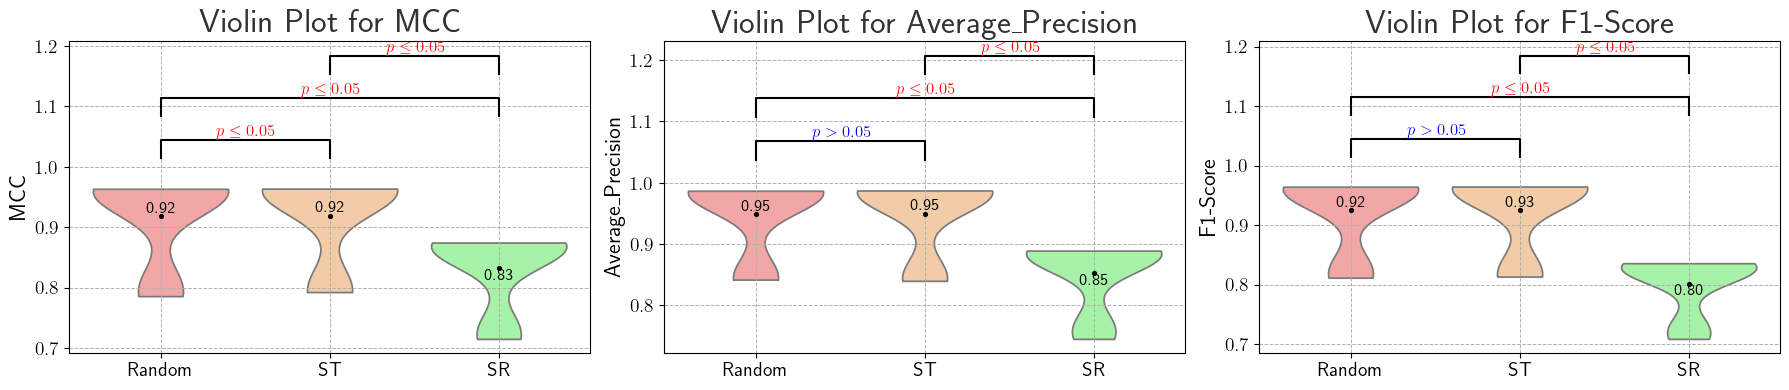

In [1]:
from synutils.utils import load_dict_from_json
from synutils.Visualization.split_comparison import SplitComparison

results = load_dict_from_json("Data/Split/Results/benchmark_schneider50k_bal_fp.json")
print(results)
vis = SplitComparison()
vis.visualize(results, ["MCC", "Average_Precision", "F1-Score"], save_path='Data/Split/Results/benchmark_schneider50k_bal_fp.png')

In [2]:
import pandas as pd

df = pd.read_csv('Data/CP/cp_results.csv')

/tmp/ipykernel_2320388/1946869791.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x=x_axis, y='Value', hue='Metric', data=df_melted, ci=None, palette=palette)


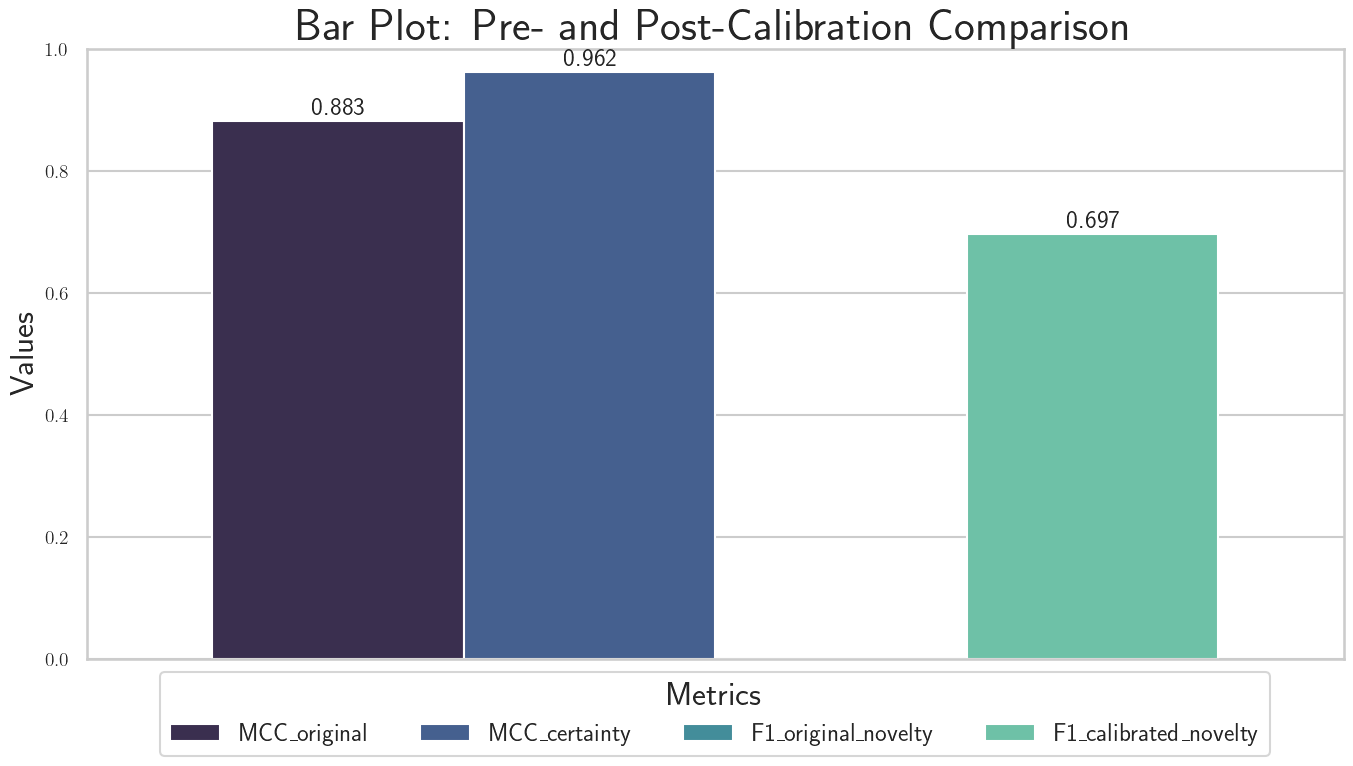

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)  # Enable LaTeX rendering
plt.rc("font", family="serif")  # Optional: use serif font

def plot_dataframe_column_pairs_bar_conditional_enhanced(df, x_axis, y_column_pairs, specific_ratio=0.1, tilte = None):
    plt.figure(figsize=(14, 8))
    sns.set_theme(style="whitegrid", context='talk')  # Enhanced style and larger context for better visibility

    # Filter the DataFrame if a specific ratio is provided
    if specific_ratio is not None:
        df = df[df[x_axis] == specific_ratio]
        if df.empty:
            print(f"No data available for {x_axis} = {specific_ratio}")
            return

    # Adjusting the DataFrame for plotting by melting it according to the pairs
    df_melted = pd.DataFrame()
    for idx, pair in enumerate(y_column_pairs):
        temp_df = df[[x_axis] + list(pair)].copy()
        temp_df['Pair'] = f"Pair {idx + 1}: {pair[0]} vs {pair[1]}"
        melted = pd.melt(temp_df, id_vars=[x_axis, 'Pair'], var_name='Metric', value_name='Value')
        df_melted = pd.concat([df_melted, melted])

    # Using a better color palette
    palette = sns.color_palette("mako", n_colors=df_melted['Metric'].nunique())

    barplot = sns.barplot(x=x_axis, y='Value', hue='Metric', data=df_melted, ci=None, palette=palette)

    # Add text labels on top of each bar
    for p in barplot.patches:
        value = p.get_height()
        if value > 0.01:  # Adjust this threshold as needed
            barplot.annotate(format(value, '.3f'),
                             (p.get_x() + p.get_width() / 2., value),
                             ha='center', va='center',
                             xytext=(0, 9),
                             textcoords='offset points')

    plt.xlabel("")  # Remove x-axis label
    plt.ylabel(r"Values", fontsize=24)
    if tilte is None:
        plt.title(r"Bar Plot Comparison of Column Pairs" + (rf" for {x_axis} = {specific_ratio}" if specific_ratio is not None else ""), fontsize=18)
    else:
        plt.title(tilte, fontsize=32, weight = 'bold')
    plt.xticks([], [])  # Remove x-axis tick labels
    plt.yticks(fontsize=14)
    plt.legend(title='Metrics', title_fontsize='24', fontsize='18', loc='upper center', bbox_to_anchor=(0.5, 0.0), ncol=4)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Example usage of the function
plot_dataframe_column_pairs_bar_conditional_enhanced(df, "Drop_class_ratio", [("MCC_original", "MCC_certainty"), ("F1_original_novelty", "F1_calibrated_novelty")], 
                                                     specific_ratio=0.1,
                                                     tilte='Bar Plot: Pre- and Post-Calibration Comparison')


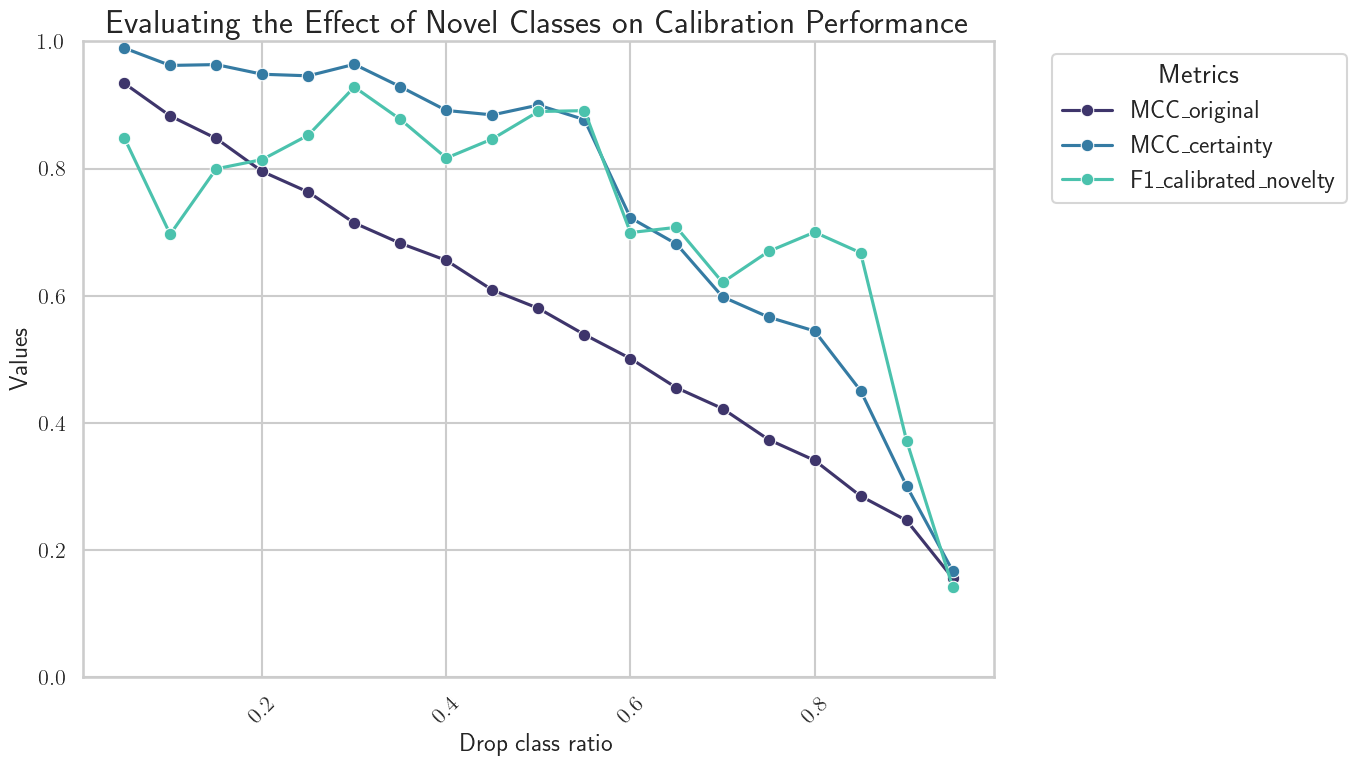

In [4]:
import seaborn as sns
plt.rc("text", usetex=True)  # Enable LaTeX rendering
plt.rc("font", family="serif")  # Optional: use serif font

def plot_dataframe(df, x_axis, y_columns):
    plt.figure(figsize=(14, 8))
    sns.set(style="whitegrid", context='talk')  # Consistent style and context for improved readability

    # Create the line plot for each column
    palette = sns.color_palette("mako", n_colors=len(y_columns))  # Dynamic color palette based on the number of columns
    for column, color in zip(y_columns, palette):
        if column in df.columns:
            sns.lineplot(x=df[x_axis], y=df[column], label=column, marker='o', color=color)
    
    plt.xlabel(x_axis.replace('_', ' ').capitalize(), fontsize=18)  # Enhanced label formatting
    plt.ylabel(r"Values", fontsize=18)
    plt.title(r"Evaluating the Effect of Novel Classes on Calibration Performance", fontsize=24, weight='bold')
    plt.xticks(rotation=45, fontsize=16)  # Enhanced tick formatting
    plt.yticks(fontsize=16)
    plt.legend(title='Metrics', title_fontsize='20', fontsize='18', bbox_to_anchor=(1.05, 1), loc='upper left')  # Responsive legend placement
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


plot_dataframe(df, 'Drop_class_ratio', ['MCC_original', 'MCC_certainty', 'F1_calibrated_novelty'])

In [53]:
import pandas as pd
from synutils.utils import load_compressed
from synutils.Partition.data_partition import DataPartition
data = load_compressed('Data/Split/data_embedding.npz')

data = pd.DataFrame(data)
data.rename(columns={0: "class_id"}, inplace=True)

partitioner = DataPartition(
    data,
    0.2,
    'class_id',
    "random",
    42,
    0.2,
    keep_data=False,
)
data_train_random, data_test_random = partitioner.fit()

partitioner = DataPartition(
    data,
    0.2,
    'class_id',
    "stratified_target",
    42,
    0.2,
    keep_data=False,
)
data_train_st, data_test_st = partitioner.fit()

partitioner = DataPartition(
    data,
    0.2,
    'class_id',
    "stratified_class_reduction",
    42,
    0.2,
    keep_data=False,
)
data_train_sr, data_test_sr = partitioner.fit()

2024-10-04 13:42:47,129 - INFO - Partition data using random approach
2024-10-04 13:42:47,132 - INFO - Partition data using stratify approach
2024-10-04 13:42:47,146 - INFO - Partition data using stratify reduction approach
/homes/biertank/tieu/Documents/Project/TACsy/SynEco/SynUtils/synutils/Partition/stratified_reduction_partition.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_remove[self.class_column] = labelencoder.fit_transform(
/homes/biertank/tieu/Documents/Project/TACsy/SynEco/SynUtils/synutils/Partition/stratified_reduction_partition.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)  # Enable LaTeX rendering
plt.rc("font", family="serif")  # Optional: use serif font

def scatter_plot(data_train, data_test, size_train=10, size_test=10, title=None, ax=None, xlabel="Coordinate 1", ylabel="Coordinate 2"):
    # Check if data is empty
    if data_train.empty or data_test.empty:
        raise ValueError("Input data frames cannot be empty.")

    # Check for necessary columns
    if data_train.columns.size < 3 or data_test.columns.size < 3:
        raise ValueError("Data frames must have at least three columns.")

    # Adding 'Type' column to differentiate between train and test data
    data_train['Type'] = 'Train'
    data_test['Type'] = 'Test'
    
    # Combine the datasets
    data_combined = pd.concat([data_train, data_test])
    
    # If no axes object is passed, create one
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    
    # Define a more distinct color palette
    pastel_palette = {'Train': 'deepskyblue', 'Test': 'magenta'}  # Using deepskyblue and magenta for better distinction

    # Create scatter plots with specified sizes
    for dtype, color in pastel_palette.items():
        subset = data_combined[data_combined['Type'] == dtype]
        ax.scatter(subset[subset.columns[1]], subset[subset.columns[2]], color=color, label=dtype, 
                   s=size_train if dtype == 'Train' else size_test, alpha=0.1, edgecolor='none')

    # Set the title if provided
    if title:
        ax.set_title(rf"{title}", fontsize=24, fontweight='bold')
    
    # Set labels
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)
    
    # Enhance grid and layout
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)

    # Get legend handles and labels for external usage
    handles, labels = ax.get_legend_handles_labels()
    
    # Return the axes, handles, and labels for further customization outside the function
    return ax, handles, labels

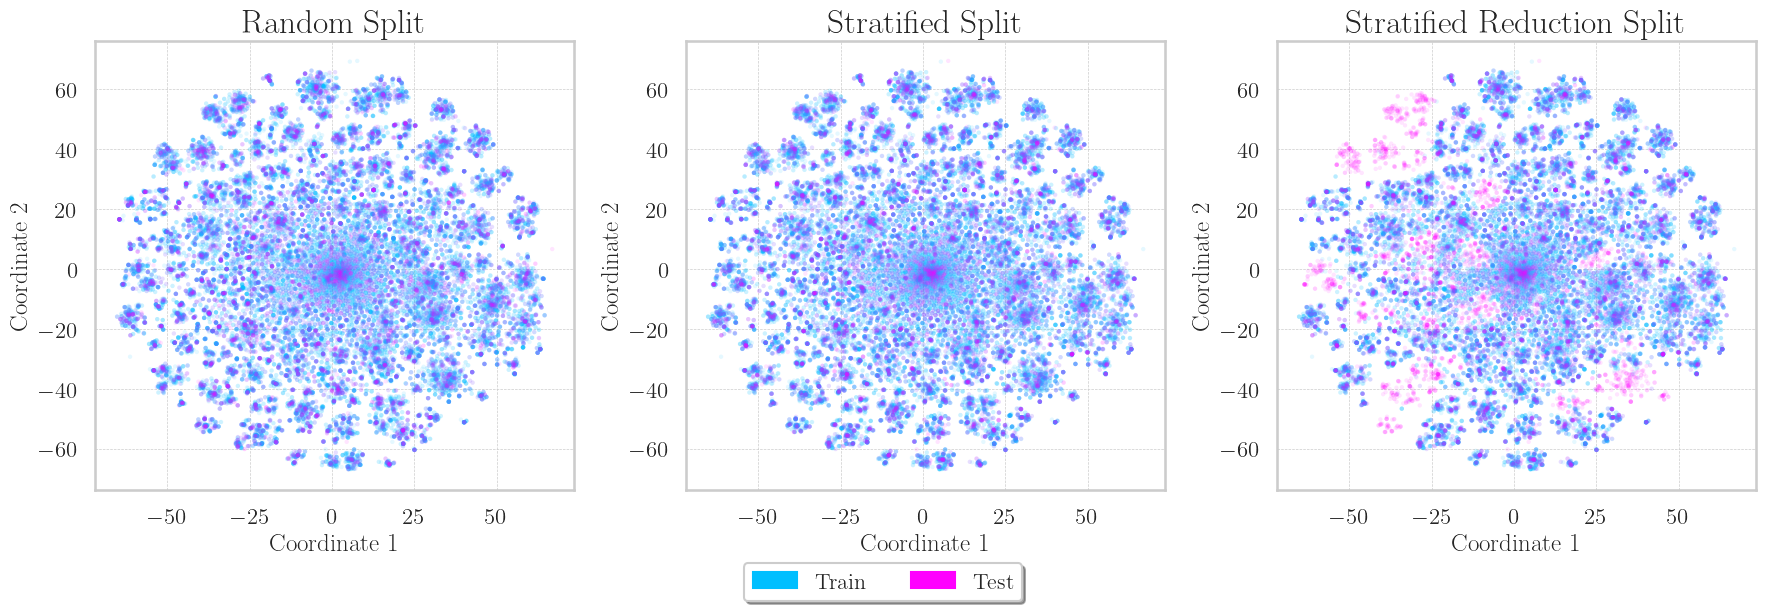

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define a function that modifies the legend handles to full opacity for better visibility in the legend
def adjust_legend_handles(handles, colors):
    new_handles = []
    for handle, color in zip(handles, colors):
        # Create a new handle with the same properties but with full alpha for the legend
        new_handle = mpatches.Patch(color=color, label=handle.get_label())
        new_handles.append(new_handle)
    return new_handles

# Create a 1x3 subplot layout
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Use the scatter_plot function on each subplot
ax1, handles1, labels1 = scatter_plot(data_train_random, data_test_random, title='Random Split', ax=axs[0])
ax2, handles2, labels2 = scatter_plot(data_train_st, data_test_st, title='Stratified Split', ax=axs[1])
ax3, handles3, labels3 = scatter_plot(data_train_sr.drop(['class_mapping'], axis=1), data_test_sr.drop(['class_mapping'], axis=1), title='Stratified Reduction Split', ax=axs[2])

# Adjust handles for full opacity in the legend
colors = ['deepskyblue', 'magenta']  # This should match the colors used in the scatter plots
adjusted_handles = adjust_legend_handles(handles1, colors)  # Assuming same types in all plots for simplicity

# Customize the legend
fig.legend(adjusted_handles, labels1, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=16, frameon=True, shadow=True)

plt.tight_layout()
plt.show()

In [65]:
from copy import deepcopy
def plot_subplots(data):
    fig, axs = plt.subplots(3, 3, figsize=(18, 18))  # Create a 3x3 grid of subplots

    ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    
    for i, ratio in enumerate(ratios):
        input_data = deepcopy(data)
        # Initialize the partitioner with different keep_ratios
        partitioner = DataPartition(
            input_data,
            test_size=0.2,  # Assuming test size is fixed for all
            class_column='class_id',
            method='stratified_class_reduction',
            random_state=42,
            drop_class_ratio=ratio,
            keep_data=False
        )
        
        # Generate the train-test split
        data_train_sr, data_test_sr = partitioner.fit()
        
        # Plot using the provided scatter_plot function
        # Assume scatter_plot is properly defined to take ax as an argument
        ax = axs[i // 3, i % 3]  # Determine the correct subplot
        scatter_plot(data_train_sr.drop(['class_mapping'], axis=1), data_test_sr.drop(['class_mapping'], axis=1), title=f'Ratio {ratio}', ax=ax)
    
    plt.tight_layout()
    plt.show()

2024-10-04 13:46:44,451 - INFO - Partition data using stratify reduction approach


ValueError: cannot insert class_mapping, already exists

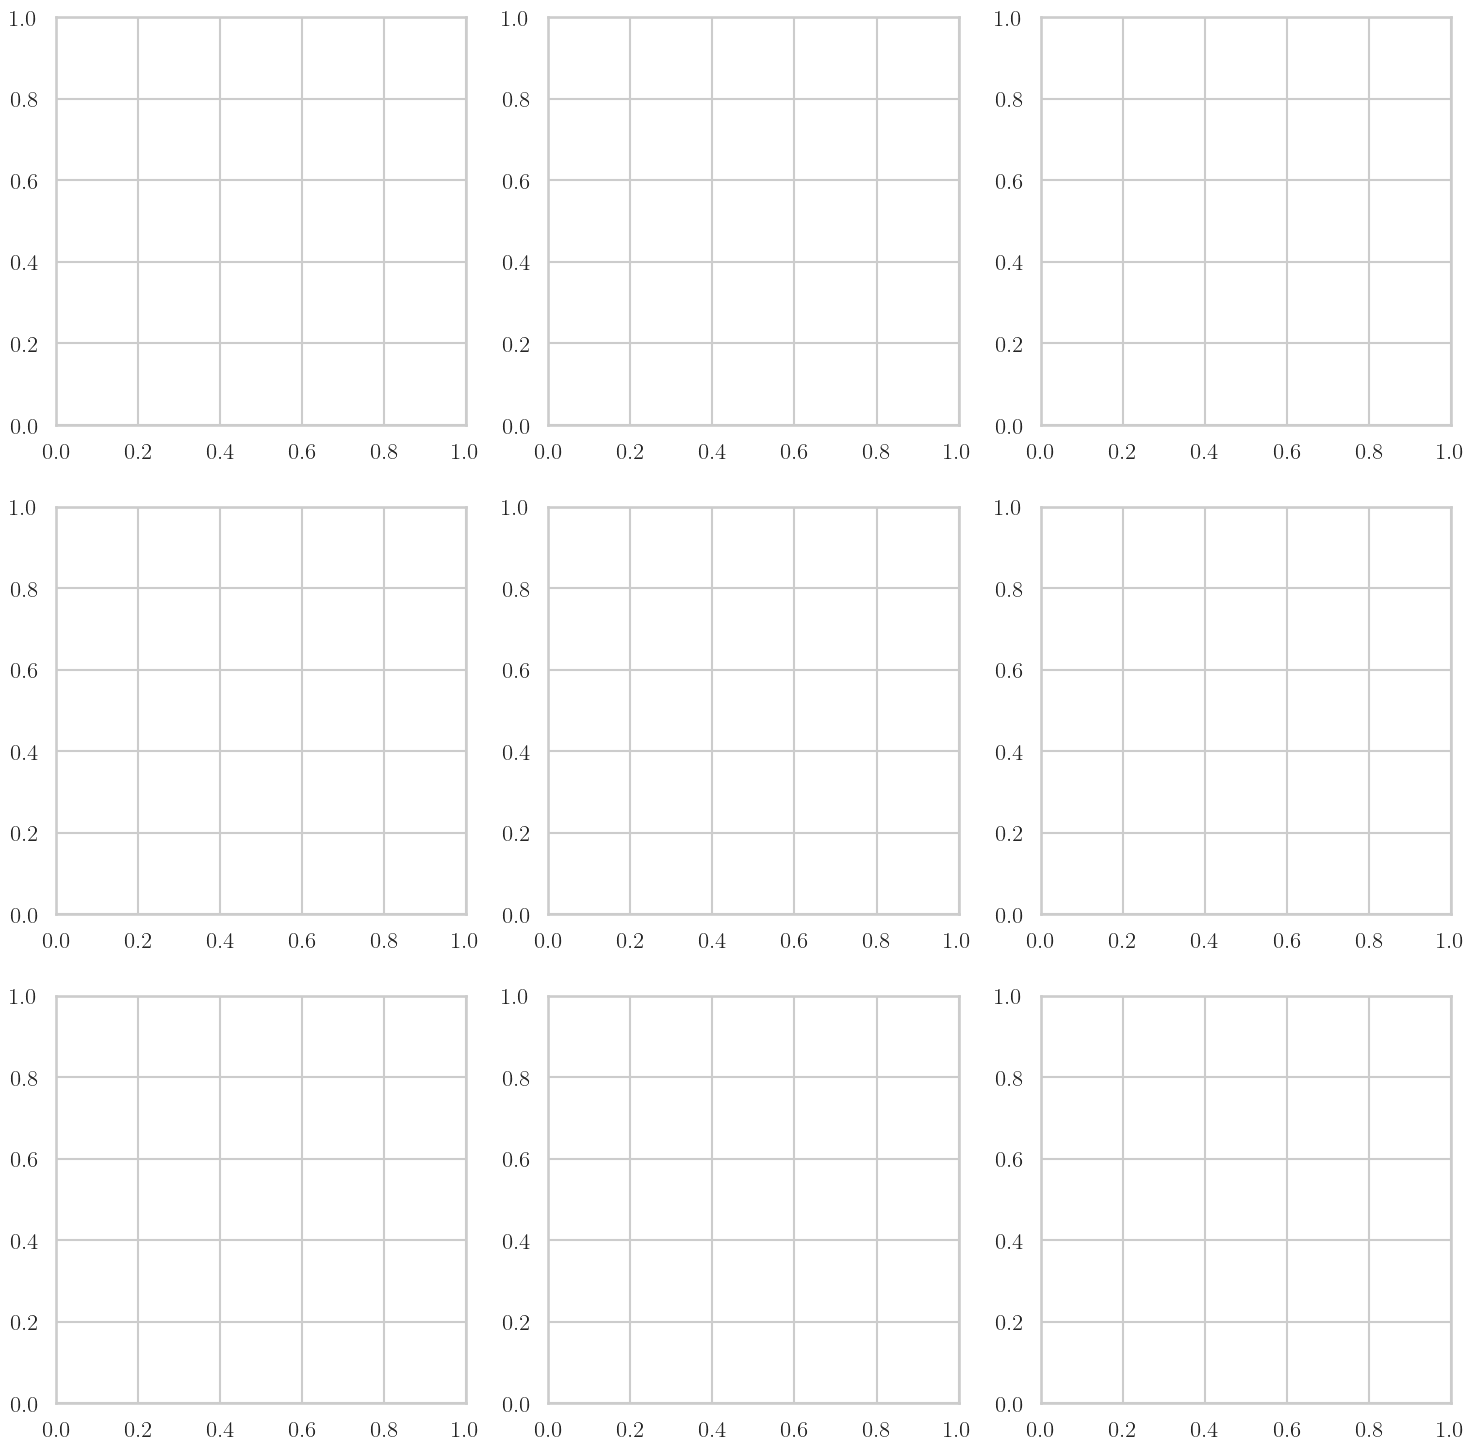

In [66]:
plot_subplots(data)